# [MultiCare Health Systems] Medical Economics Analyst 2nd Round Interview Project

As per the email:

> Below is a link to some data that the Centers for Medicare & Medicaid Services (CMS) provides publicly for research and analysis. The introductory paragraphs on the website provide detailed background information on the files. Additionally, you are able to download a data dictionary & methodology file along with the datasets.

[CMS County-level Aggregate Expenditure and Risk Score Data on Assignable Beneficiaries](https://data.cms.gov/medicare-shared-savings-program/county-level-aggregate-expenditure-and-risk-score-data-on-assignable-beneficiaries)

> Please put together some analysis that evaluates the trend of the available variables (expenditures, person years & risk score) from 2019 - 2023 for the Aged / Non - Dual population in the primary counties MultiCare serves in Washington state.
> The primary counties MultiCare serves include:

-   Pierce
-   Spokane
-   Thurston
-   Yakima
-   King
-   Kitsap

> If you find anything else interesting in the data, please plan to share that as well. The intended audience will be fellow analysts and your supervisor. We'll ask you to walk through your approach & findings for ~15 minutes and then we'll ask some questions about what you did. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import re

csv_files = glob.glob(os.path.join('data/', '*.csv'))
dfs = [pd.read_csv(file) for file in csv_files]

primary_counties = ['PIERCE', 'SPOKANE', 'THURSTON', 'YAKIMA', 'KING', 'KITSAP']

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
csv_files

['data\\County_level_Aggregate_Expenditure_and_Risk_Score_Data_on_Assignable_Beneficiaries_2019.csv',
 'data\\County_level_Aggregate_Expenditure_and_Risk_Score_Data_on_Assignable_Beneficiaries_2020.csv',
 'data\\County_level_Aggregate_Expenditure_and_Risk_Score_Data_on_Assignable_Beneficiaries_2021.csv',
 'data\\County_level_Aggregate_Expenditure_and_Risk_Score_Data_on_Assignable_Beneficiaries_2022.csv',
 'data\\County_level_Aggregate_Expenditure_and_Risk_Score_Data_on_Assignable_Beneficiaries_2023_oc2.csv']

In [4]:
# Check if columns match between all csv data
for i in range (1, 5):
    print(f'Comparing df_0 to df_{i}')
    if sum(dfs[0].columns == dfs[i].columns) != 21:
        print('Column mismatch')
    else:
        print('Columns match')

Comparing df_0 to df_1
Columns match
Comparing df_0 to df_2
Columns match
Comparing df_0 to df_3
Columns match
Comparing df_0 to df_4
Columns match


In [5]:
# Merge all yearly data together and filter by primary counties in WA
full_df = pd.concat(dfs, ignore_index=True, sort=False)
df = full_df[(full_df['STATE_NAME'] == 'WASHINGTON') & full_df['COUNTY_NAME'].isin(primary_counties)]

list(df.columns)


['YEAR',
 'STATE_NAME',
 'COUNTY_NAME',
 'STATE_ID',
 'COUNTY_ID',
 'PER_CAPITA_EXP_ESRD',
 'AVG_RISK_SCORE_ESRD',
 'AVG_DEMOG_SCORE_ESRD',
 'PERSON_YEARS_ESRD',
 'PER_CAPITA_EXP_DIS',
 'AVG_RISK_SCORE_DIS',
 'AVG_DEMOG_SCORE_DIS',
 'PERSON_YEARS_DIS',
 'PER_CAPITA_EXP_AGDU',
 'AVG_RISK_SCORE_AGDU',
 'AVG_DEMOG_SCORE_AGDU',
 'PERSON_YEARS_AGDU',
 'PER_CAPITA_EXP_AGND',
 'AVG_RISK_SCORE_AGND',
 'AVG_DEMOG_SCORE_AGND',
 'PERSON_YEARS_AGND']

In [6]:
df

,YEAR,STATE_NAME,COUNTY_NAME,STATE_ID,COUNTY_ID,PER_CAPITA_EXP_ESRD,AVG_RISK_SCORE_ESRD,AVG_DEMOG_SCORE_ESRD,PERSON_YEARS_ESRD,PER_CAPITA_EXP_DIS,...,AVG_DEMOG_SCORE_DIS,PERSON_YEARS_DIS,PER_CAPITA_EXP_AGDU,AVG_RISK_SCORE_AGDU,AVG_DEMOG_SCORE_AGDU,PERSON_YEARS_AGDU,PER_CAPITA_EXP_AGND,AVG_RISK_SCORE_AGND,AVG_DEMOG_SCORE_AGND,PERSON_YEARS_AGND
3049,2019,WASHINGTON,KING,50,160,85884.17,0.99345,0.99781,1187,10681.9,...,0.98724,11673.17,12199.85,0.84725,0.96824,12380.33,9991.2,0.96744,1.0096,101324.75
3050,2019,WASHINGTON,KITSAP,50,170,75617.48,1.0109,0.98682,174.42,9332.27,...,0.97005,3005,15590.36,0.96293,0.98444,1460.42,9136.21,0.93209,0.9741,24880.92
3059,2019,WASHINGTON,PIERCE,50,260,84479.99,0.98751,0.97853,718.25,10338.02,...,0.96725,8117.08,15121.76,0.97427,0.97198,4093.67,10137.89,1.02281,1.00809,50255.17
3064,2019,WASHINGTON,SPOKANE,50,310,83766.5,0.94089,1.00161,350,9970.41,...,0.97446,6180.83,15325.24,0.95677,0.97931,2305.58,10363.07,0.99938,1.01953,35909.75
3066,2019,WASHINGTON,THURSTON,50,330,93119.72,1.02708,0.97188,165.5,8468.98,...,0.96673,3138.42,15645.74,0.98217,0.99827,1428.83,9223.48,0.93955,0.98591,20079.08
3071,2019,WASHINGTON,YAKIMA,50,380,78454.51,0.9678,1.02717,228.58,9199.18,...,0.99422,3318.58,14662.86,0.93455,1.00462,2239.42,8468.17,0.93338,1.02524,19465.92
6274,2020,WASHINGTON,KING,50,160,85195.22,0.98937,0.99773,1132.75,10334.05,...,0.98565,10011.33,11723.45,0.84624,0.96844,10731.42,9230.24,0.96891,1.01108,96115.25
6275,2020,WASHINGTON,KITSAP,50,170,85872.94,1.01042,0.9945,171.92,8921.49,...,0.96651,2621.67,15042.67,0.9782,0.98234,1392.92,8495.64,0.9379,0.98047,24171.33
6284,2020,WASHINGTON,PIERCE,50,260,82738.07,1.01581,0.98312,695.5,10390.29,...,0.97096,7042.67,15712.69,1.03721,0.97098,3713.33,9327.21,1.02964,1.01373,48290.75
6289,2020,WASHINGTON,SPOKANE,50,310,77515.8,0.96112,0.9879,341,9273.22,...,0.96973,5422.33,16000.91,0.97056,0.98217,2111.67,9382.9,1.0017,1.02535,34234.67


In [7]:
cols_to_fix = ['PER_CAPITA_EXP_ESRD',
'AVG_RISK_SCORE_ESRD',
'AVG_DEMOG_SCORE_ESRD',
'PERSON_YEARS_ESRD',
'PER_CAPITA_EXP_DIS',
'AVG_RISK_SCORE_DIS',
'AVG_DEMOG_SCORE_DIS',
'PERSON_YEARS_DIS',
'PER_CAPITA_EXP_AGDU',
'AVG_RISK_SCORE_AGDU',
'AVG_DEMOG_SCORE_AGDU',
'PERSON_YEARS_AGDU',
'PER_CAPITA_EXP_AGND',
'AVG_RISK_SCORE_AGND',
'AVG_DEMOG_SCORE_AGND',
'PERSON_YEARS_AGND']


for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts bad values to NaN

agnd_summary = df.groupby('YEAR')[
    ['PER_CAPITA_EXP_AGND', 'PERSON_YEARS_AGND', 'AVG_RISK_SCORE_AGND']
].mean().reset_index()
agnd_summary

C:\Users\UserALai\AppData\Local\Temp\ipykernel_22512\804657358.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts bad values to NaN


,YEAR,PER_CAPITA_EXP_AGND,PERSON_YEARS_AGND,AVG_RISK_SCORE_AGND
0,2019,9553.336667,41985.931667,0.965775
1,2020,8660.003333,40127.695000,0.966893
2,2021,9420.783333,39732.195000,0.974643
3,2022,10012.185000,39003.973333,0.979940
4,2023,11101.661667,35406.986667,1.022753


### Trend Plots

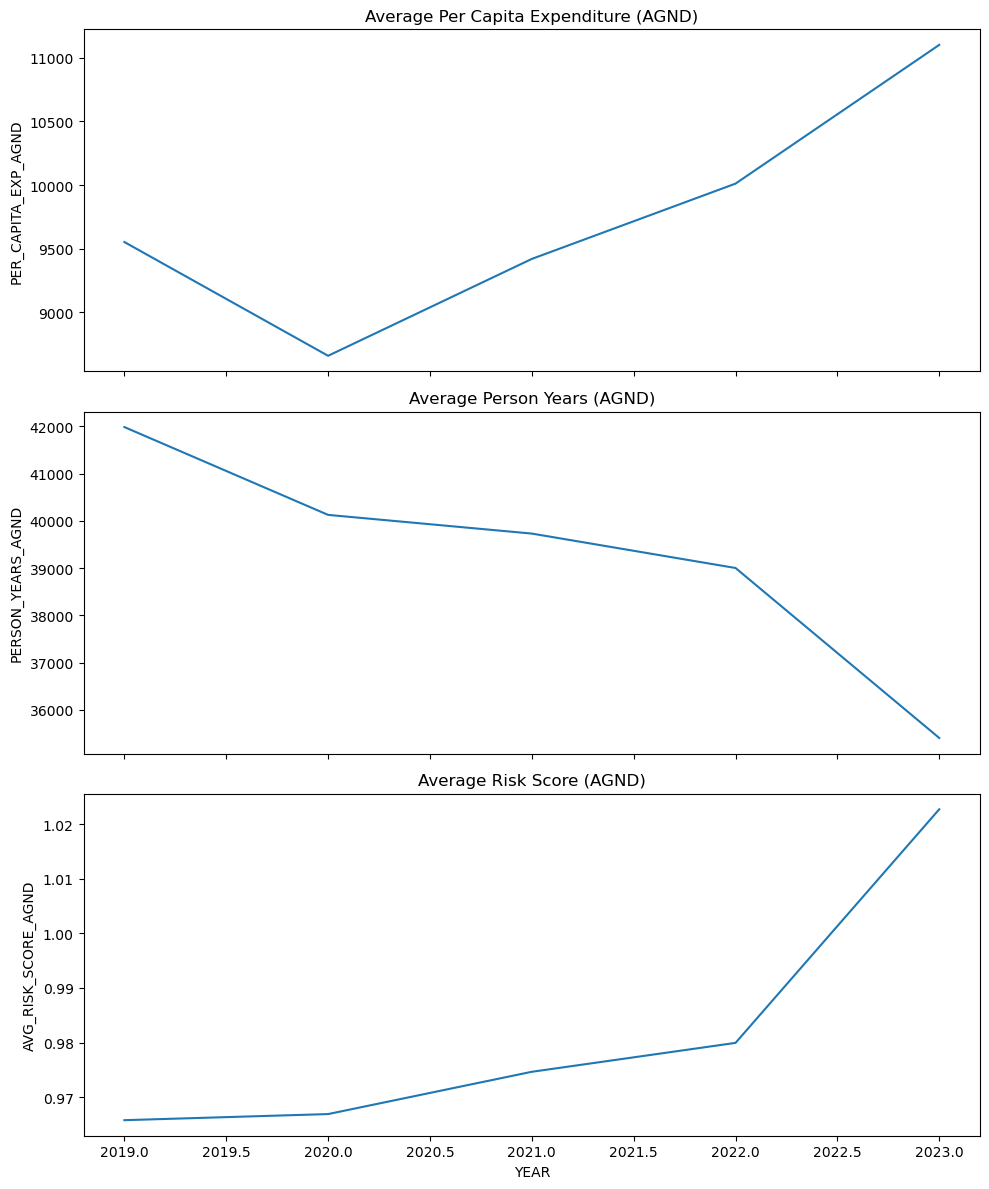

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

sns.lineplot(data=agnd_summary, x='YEAR', y='PER_CAPITA_EXP_AGND', ax=axs[0])
axs[0].set_title('Average Per Capita Expenditure (AGND)')

sns.lineplot(data=agnd_summary, x='YEAR', y='PERSON_YEARS_AGND', ax=axs[1])
axs[1].set_title('Average Person Years (AGND)')

sns.lineplot(data=agnd_summary, x='YEAR', y='AVG_RISK_SCORE_AGND', ax=axs[2])
axs[2].set_title('Average Risk Score (AGND)')

plt.tight_layout()
plt.show()


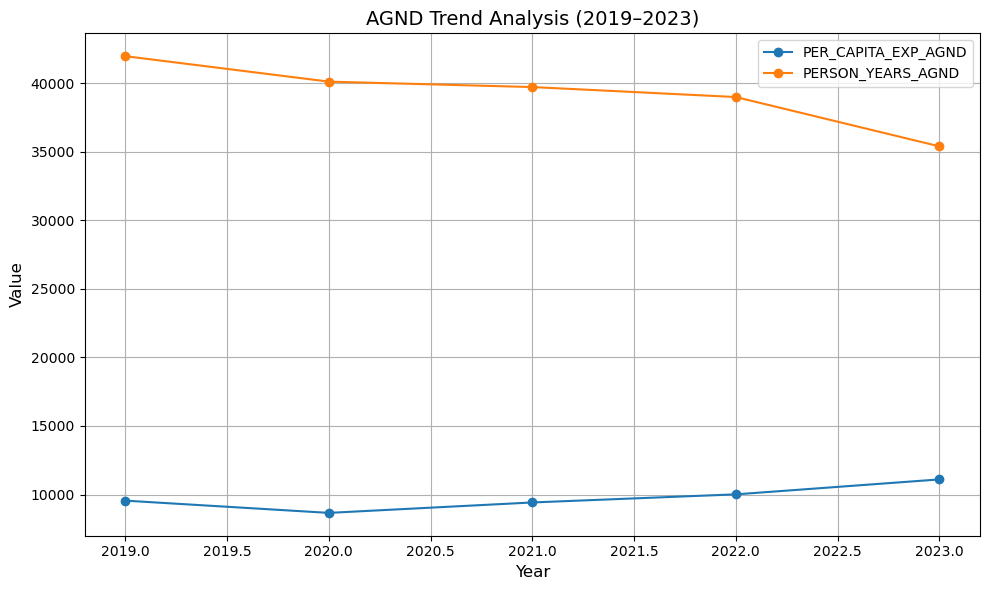

In [9]:
import matplotlib.pyplot as plt

# List of columns to plot
cols_to_plot = [
    'PER_CAPITA_EXP_AGND',
    'PERSON_YEARS_AGND',
    'AVG_RISK_SCORE_AGND',
    'AVG_DEMOG_SCORE_AGND'
]

# Group by YEAR and calculate the average across counties
trend_summary = df.groupby('YEAR')[cols_to_plot].mean().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each variable
for col in cols_to_plot[:2]:
    plt.plot(trend_summary['YEAR'], trend_summary[col], marker='o', label=col)
# for col in cols_to_plot[2:]:
#     plt.plot(trend_summary['YEAR'], trend_summary[col], marker='o', label=col)
# Customize the plot
plt.title('AGND Trend Analysis (2019–2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


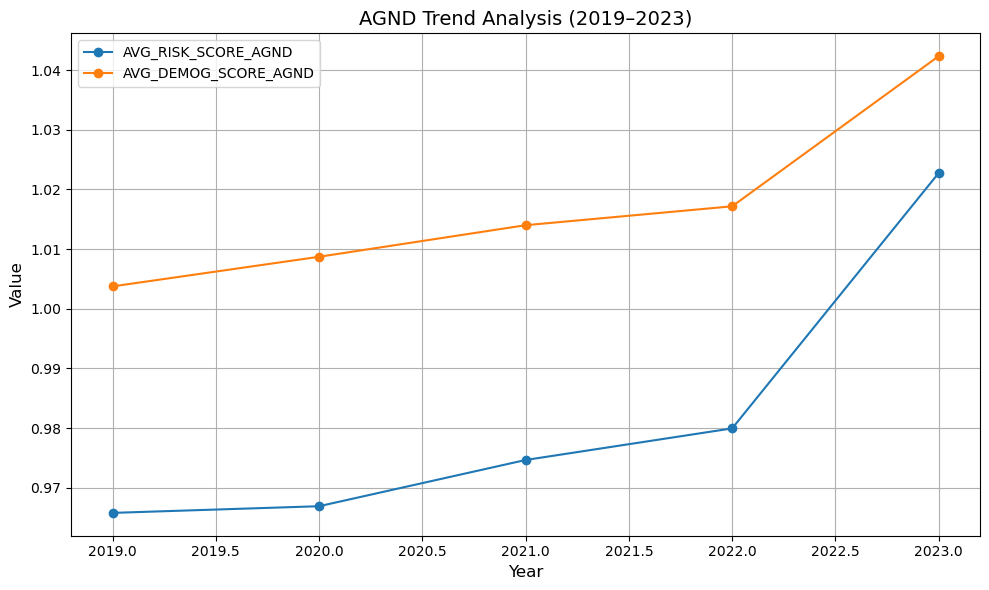

In [10]:
import matplotlib.pyplot as plt

# List of columns to plot
cols_to_plot = [
    'PER_CAPITA_EXP_AGND',
    'PERSON_YEARS_AGND',
    'AVG_RISK_SCORE_AGND',
    'AVG_DEMOG_SCORE_AGND'
]

# Group by YEAR and calculate the average across counties
trend_summary = df.groupby('YEAR')[cols_to_plot].mean().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each variable
# for col in cols_to_plot[:2]:
#     plt.plot(trend_summary['YEAR'], trend_summary[col], marker='o', label=col)
for col in cols_to_plot[2:]:
    plt.plot(trend_summary['YEAR'], trend_summary[col], marker='o', label=col)
# Customize the plot
plt.title('AGND Trend Analysis (2019–2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


### Correlation matrix

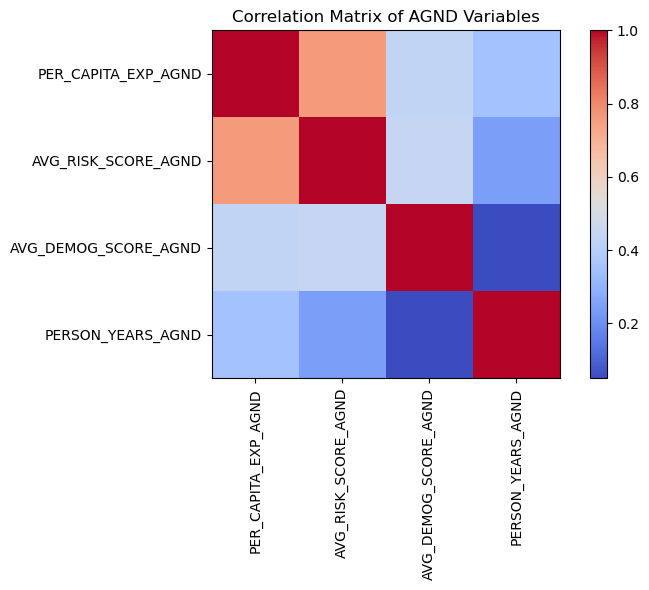

In [11]:
cols = [col for col in df.columns if col.endswith('_AGND')]
df_corr = df[cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(df_corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns, rotation=90)
plt.yticks(range(len(df_corr)), df_corr.columns)
plt.title('Correlation Matrix of AGND Variables')
plt.tight_layout()
plt.show()


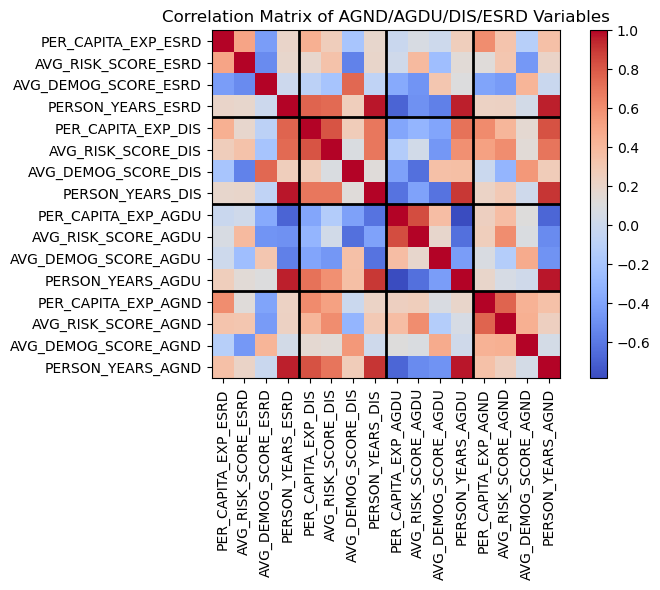

In [12]:
import matplotlib.pyplot as plt

cols = [col for col in df.columns if col.endswith('_AGND') | col.endswith('_AGDU') | col.endswith('_DIS') | col.endswith('_ESRD')]
df_corr = df[cols].corr()

plt.figure(figsize=(8, 6))
plt.imshow(df_corr, cmap='coolwarm', interpolation='none')
plt.colorbar()

plt.xticks(range(len(df_corr)), df_corr.columns, rotation=90)
plt.yticks(range(len(df_corr)), df_corr.columns)

# borders every 4 cells to separate blocks/enrollment groups
for i in range(4, len(df_corr), 4):
    plt.axhline(i - 0.5, color='black', linewidth=2)
    plt.axvline(i - 0.5, color='black', linewidth=2)

plt.title('Correlation Matrix of AGND/AGDU/DIS/ESRD Variables')
plt.tight_layout()
plt.show()


#### Scatterplot

Purpose of this is to see the direction of correlation

Text(0, 0.5, 'Expenditure AGDU')

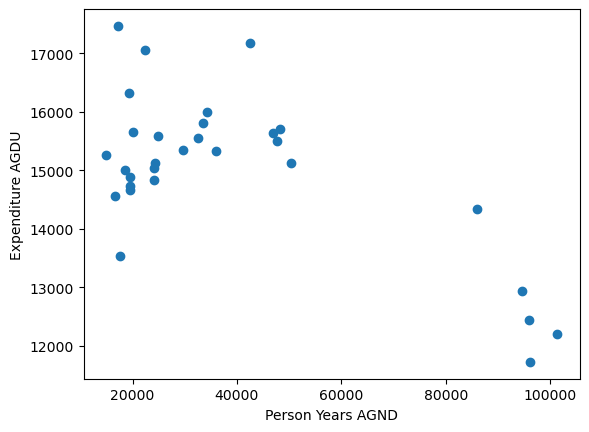

In [26]:
plt.plot(df['PERSON_YEARS_AGND'], df['PER_CAPITA_EXP_AGDU'], 'o')
plt.xlabel('Person Years AGND')
plt.ylabel('Expenditure AGDU')

#### Bar charts

<Axes: title={'center': 'Per Capita Expenditures (AGND) by County per Year'}, xlabel='YEAR'>

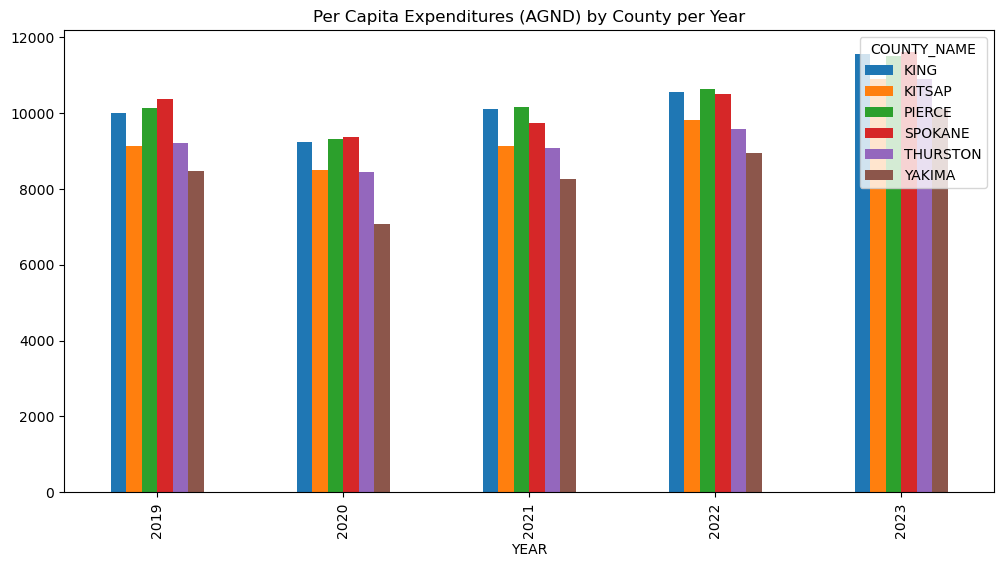

In [14]:
pivot = df.pivot(index='YEAR', columns='COUNTY_NAME', values='PER_CAPITA_EXP_AGND')
pivot.plot(kind='bar', figsize=(12, 6), title='Per Capita Expenditures (AGND) by County per Year')


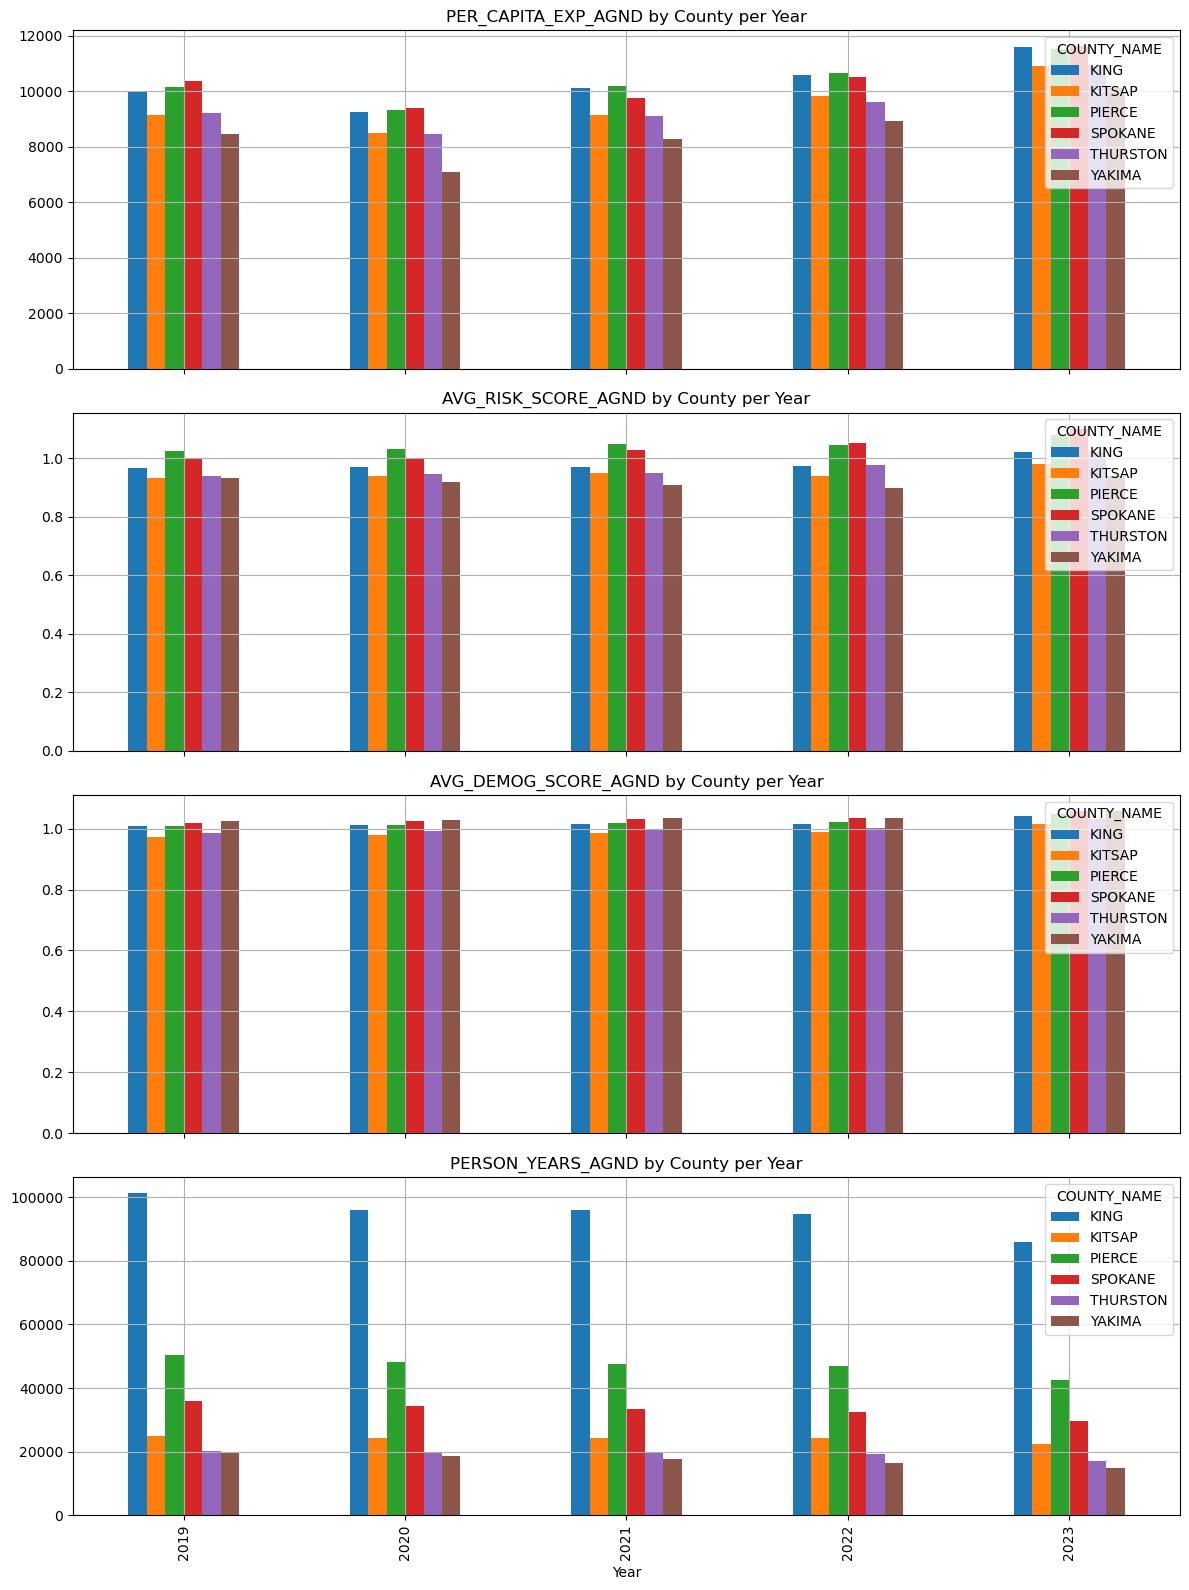

In [23]:

# Plotting each AGND column as a separate subplot
# agnd_columns = [col for col in df.columns if col.endswith('_AGND') | col.endswith('_AGDU') | col.endswith('_DIS') | col.endswith('_ESRD')]
# fig, axs = plt.subplots(len(agnd_columns), 1, figsize=(12, 36), sharex=True)

agnd_columns = [col for col in df.columns if col.endswith('_AGND')]
fig, axs = plt.subplots(len(agnd_columns), 1, figsize=(12, 16), sharex=True)


for i, col in enumerate(agnd_columns):
    # for county in df['COUNTY_NAME'].unique():
    #     subset = df[df['COUNTY_NAME'] == county]
    #     axs[i].plot(subset['YEAR'], subset[col], marker='o', label=county)

    pivot = df.pivot(index='YEAR', columns='COUNTY_NAME', values=col)
    pivot.plot(kind='bar', title=f'{col} by County per Year', ax=axs[i])

    # axs[i].set_title(col)
    # axs[i].set_ylabel(col)
    # axs[i].legend(loc='best')
    axs[i].grid(True)

axs[-1].set_xlabel('Year')
plt.tight_layout()
plt.show()
